In [510]:
 # import libraries
import numpy as  np
import pandas as pd
import  array
import matplotlib.pyplot as plt
import sklearn
import pickle
import warnings
import csv
warnings.filterwarnings('ignore')

In [511]:
# import dataset
dataset =  pd.read_csv('/home/admin1/PycharmProjects/Basic Python/myprograms/WEEK_9/simple linear regression/Data/Salary_Data.csv')

In [512]:
# # divide data in train set and test set
# test_set = dataset.tail(5)
# train_set = dataset.head(dataset.shape[0]-5)
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(dataset,test_size = 0.20)

In [513]:
# save test data into csv file
x_test.to_csv('test.csv',index=False)

In [514]:
# save train data into csv file 
x_train.to_csv('train.csv',index=False)

In [515]:
# reading train csv file
train_data = pd.read_csv('train.csv')

In [516]:
# split train data into training data and testing data
from sklearn.model_selection import train_test_split
x_train_data,cross_valid = train_test_split(train_data,test_size = 0.20)
# x_train_data.shape

In [517]:
x_train_data.shape

(19, 2)

In [518]:
cross_valid.shape

(5, 2)

In [519]:
# save cross validation data to csv file
cross_valid.to_csv('cross_validate.csv',index=False)

In [520]:
# split x_train_data into x and y  
x = x_train_data.iloc[:,:-1].values
y = x_train_data.iloc[:,1].values

In [521]:
# fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [522]:
regressor.score(x,y)

0.9578170019798465

In [523]:
y_pred_train =  regressor.predict(x)
print(y_pred_train)

[124578.28613534  44586.44379628 110121.92908611  72535.40075812
  91810.54349043  33985.11529351  37840.14383997  61934.07225535
  66752.85793843  70607.88648489  74462.91503135  62897.82939197
  59042.80084551 115904.47190581  54224.01516243  52296.5008892
  99520.60058335 102411.87199319  60970.31511874]


In [524]:
# split  cross validate data into x_cv and y_cv
x_cv = cross_valid.iloc[:,:-1].values
y_cv = cross_valid.iloc[:,1].values

In [525]:
# predicting the test set result
y_pred_test = regressor.predict(x_cv)

In [526]:
# display y_predict value 
print(y_pred_test)

[114940.71476919 107230.65767627  88919.27208058  42658.92952305
  51332.74375259]


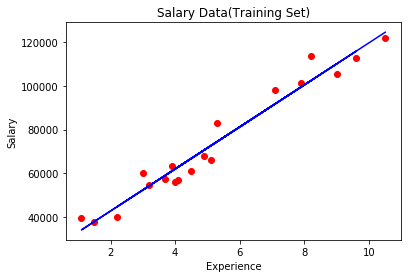

In [527]:
# visualizing the training set result
plt.scatter(x,y,color='red')
plt.plot(x,regressor.predict(x),color='blue')
plt.title('Salary Data(Training Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

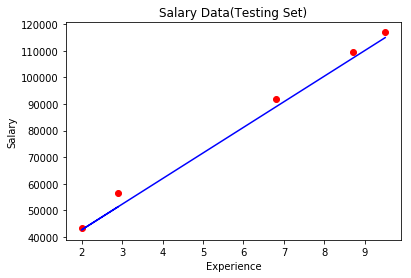

In [528]:
# visualizing the testing set result
plt.scatter(x_cv,y_cv,color='red')
plt.plot(x_cv,regressor.predict(x_cv),color='blue')
plt.title('Salary Data(Testing Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [529]:
train_accuracy = sklearn.metrics.r2_score(y,y_pred_train)*100
print("Accuracy of train data =",train_accuracy)

test_accuraccy = sklearn.metrics.r2_score(y_cv,y_pred_test)*100
print("Accuracy of test data =",  test_accuraccy)

Accuracy of train data = 95.78170019798465
Accuracy of test data = 98.90328995815779


In [530]:
# create model with pickle file
file = open('training.pkl', 'wb')
pickle.dump(regressor,file)
file.close()